In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

In [3]:
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

In [4]:
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)

In [6]:
forest.fit(X, y)
importances = forest.feature_importances_
print(importances)

[ 0.25039843  0.23239744  0.14889819  0.05536337  0.05048869  0.05387803
  0.05258284  0.05096332  0.05401004  0.05101965]


In [9]:
indices = np.argsort(importances)[::-1]

<Container object of 10 artists>

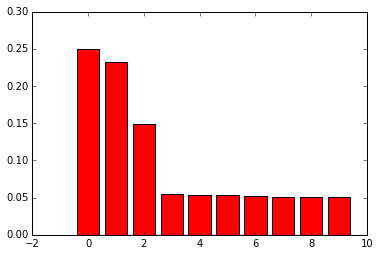

In [10]:
plt.bar(range(10), importances[indices],
       color="r", align="center")

In [11]:
from sklearn import svm
from sklearn.datasets import samples_generator
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline

In [12]:
# import some data to play with
X, y = samples_generator.make_classification(
    n_features=20, n_informative=3, n_redundant=0, n_classes=4,
    n_clusters_per_class=2)

In [13]:
# ANOVA SVM-C
# 1) anova filter, take 3 best ranked features
anova_filter = SelectKBest(f_regression, k=3)
# 2) svm
clf = svm.SVC(kernel='linear')

In [21]:
anova_svm = make_pipeline(anova_filter, clf)
model = anova_svm.fit(X, y)
pred = anova_svm.predict(X)